**Projekt ma na celu zbadania jak statystyki i cechy piłkarza wpływają na jego cenę.**


Opis danych
-----------

Dane zawierają informacje o zawodnikach wystawionych w okienku 2019/2020.
3787 zawodników wartych nie mniej niż 2 mln euro według transfermarket.
dane posiadają 112 kolumn podzielonych na 7 grup:

+ Dane ogólne
+ Obrona
+ Atak
+ Podnie
+ Kluczowe podanie
+ Bramkarz
+ Rzuty wolne


* <details><summary>Dane ogólne:</summary>

    - Team
    - Position
    - Age
    - Market value
    - Contract expires
    - Matches played
    - Minutes played
    - Goals
    - xG
    - Assists
    - xA
    - Birth country
    - Passport country
    - Foot
    - Height
    - Weight
    - On loan
</details>

* * <details><summary>Obrona:</summary>
    
    - Succ. def. per 90
    - Def duels per 90
    - Def duels won %
    - Aerial duels per 90
    - Aerial duels won %
    - Tackles per 90
    - Tackles per opp.30
    - Tackle succ. %
    - Shots blocked per 90
    - Interceptions per 90
    - Interceptions per opp.30
    - Fouls per 90
    - Yellow cards
    - Yellow cards per 90
    - Red cards
    - Red cards per 90
</details>

* * <details><summary>Atak:</summary>
    
    - Succ. att. actions
    - Goals total
    - Goals per 90
    - Non-penalty goals
    - Non-penalty goals per 90
    - xG
    - xG per 90
    - Head goals total
    - Head goals per 90
    - Shots total
    - Shots per 90
    - Shots on target %
    - Goal conv., %
    - Assists
    - Assists per 90
    - Crosses per 90
    - Crosses, %
    - Crosses from left per 90
    - Crosses from left, %
    - Crosses from right per 90
    - Crosses from right, %
    - Crosses to goalie box per 90
    - Dribbles per 90
    - Dribbles succ. %
    - Off duels per 90
    - Off duels won %
    - Touches in box per 90
    - Progressive runs per 90
</details>

* * <details><summary>Podanie:</summary>
    
    - Passes per 90
    - Passes acc. %
    - Fwd passes per 90
    - Fwd passes acc. %
    - Back passes per 90
    - Back passes acc. %
    - Lat passes per 90
    - Lat passes acc. %
    - Sh/m passes per 90
    - Sh/m passes acc. %
    - Lng passes per 90
    - Lng passes acc. %
    - Avg pass length, m
    - Avg lng pass length, m
</details>

* * <details><summary>Kluczowe podanie:</summary>
    
    - Assists
    - Assists per 90
    - xA
    - xA per 90
    - Second assists per 90
    - Third assists per 90
    - Smt passes per 90
    - Smt passes acc. %
    - Key passes per 90
    - Final 3rd passes per 90
    - Final 3rd passes acc. %
    - Passes to penalty area per 90
    - Passes to penalty area acc. %
    - Thru passes per 90
    - Thru passes acc. %
    - Deep completed passes per 90
    - Deep completed passes acc. %
    - Deep completed crosses per 90
    - Deep completed crosses acc. %
    - Progressive passes per 90
</details>

* * <details><summary>Bramkarz:</summary>
    
    - Goals total
    - Goals per 90
    - Shots total
    - Shots per 90
    - Clean sheets
    - Save %
    - xG against
    - xG against per 90
    - Back passes to GK per 90
    - Exits per 90
    - Punches per 90
    - Punches, %
    - Claims per 90
    - Claim/punch ratio
    - Aerial duels per 90
    - Aerial duels won %
</details>

* * <details><summary>Rzuty wolne(Set pieces):</summary>
    
    - FKs per 90
    - DFKs per 90
    - DFKs on target %
    - Corners per 90
    - Penalties taken
    - Penalty conversion %
</details>

In [5]:
import pandas as pd

data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3787 entries, 0 to 3786
Columns: 112 entries, Player to Penalty conversion %
dtypes: float64(87), int64(17), object(8)
memory usage: 3.2+ MB


In [12]:
data.head()

,Player,Team,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,xG,...,Claims per 90,Claim/punch ratio,Aerial duels per 90.1,Aerial duels won %.1,FKs per 90,DFKs per 90,DFKs on target %,Corners per 90,Penalties taken,Penalty conversion %
0,J. Sancho,Borussia Dortmund,"RAMF, RWF, LWF",19,120000000,2022-06-30,32,2530,17,9.43,...,NaN,NaN,NaN,NaN,0.14,0.00,0.0,1.39,0,0.0
1,João Félix,Atlético Madrid,"CF, RW",20,100000000,2026-06-30,28,2192,4,8.56,...,NaN,NaN,NaN,NaN,0.08,0.08,0.0,0.33,1,100.0
2,K. Havertz,Bayer Leverkusen,"AMF, RAMF, CF",20,90000000,2022-06-30,27,2299,5,5.07,...,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.35,0,0.0
3,M. de Ligt,Juventus,"LCB, RCB",20,75000000,2024-06-30,28,2587,2,1.87,...,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
4,G. Donnarumma,Milan,GK,20,55000000,2021-06-30,26,2515,0,0.00,...,0.89,2.5,0.43,91.67,NaN,NaN,NaN,0.00,0,0.0


Grupowanie kolumn
--------
Przypisuję nazwy kolumn odpowiednim grupą, wyrzucam powtarzające się zmienne i zmienne liniowo zależne.
Odrzucam wszystkich bramkarzy i wszystkie zmienne związane ze statystykami tej pozycji.

In [6]:
general = ['Player', 'Team', 'Position', 'Age', 'Contract expires', 'Matches played', 'Minutes played',
    'Goals', 'Assists', 'Birth country',
    'Passport country', 'Foot', 'Height', 'Weight', 'On loan']
back = ['Succ. def. per 90','Def duels per 90','Def duels won %','Aerial duels per 90','Aerial duels won %',
    'Tackles per 90','Tackles per opp.30','Tackle succ. %','Shots blocked per 90','Interceptions per 90',
    'Interceptions per opp.30','Fouls per 90',
    'Yellow cards',  #     'Yellow cards per 90',
    'Red cards',#     'Red cards per 90',
]
atack = ['Succ. att. actions','Goals total',
    #     'Goals per 90',
    'Non-penalty goals',
    #     'Non-penalty goals per 90',
    'xG',
    #     'xG per 90',
    'Head goals total',
    #     'Head goals per 90',
    'Shots total',
    #     'Shots per 90',
    'Shots on target %','Goal conv., %',
    #     'Assists',
    #     'Assists per 90',
    'Crosses per 90','Crosses, %','Crosses from left per 90','Crosses from left, %','Crosses from right per 90',
    'Crosses from right, %','Crosses to goalie box per 90','Dribbles per 90','Dribbles succ. %','Off duels per 90',
    'Off duels won %','Touches in box per 90','Progressive runs per 90',]
passes = ['Passes per 90','Passes acc. %','Fwd passes per 90','Fwd passes acc. %','Back passes per 90',
    'Back passes acc. %','Lat passes per 90','Lat passes acc. %','Sh/m passes per 90','Sh/m passes acc. %',
    'Lng passes per 90','Lng passes acc. %','Avg pass length, m','Avg lng pass length, m',]
key_passes = [
    #     'Assists',
    #     'Assists per 90',
    #     'xA',
    #     'xA per 90',
    'Second assists per 90','Third assists per 90','Smt passes per 90','Smt passes acc. %',
    'Key passes per 90','Final 3rd passes per 90','Final 3rd passes acc. %','Passes to penalty area per 90',
    'Passes to penalty area acc. %','Thru passes per 90','Thru passes acc. %','Deep completed passes per 90',
    'Deep completed passes acc. %','Deep completed crosses per 90','Deep completed crosses acc. %',
    'Progressive passes per 90',]
goal_keeper = ['Goals total','Goals per 90','Shots total', 'Shots per 90','Clean sheets','Save %',
    'xG against','xG against per 90','Back passes to GK per 90','Exits per 90','Punches per 90',
    'Punches, %','Claims per 90','Claim/punch ratio','Aerial duels per 90','Aerial duels won %',]
free_kick = ['FKs per 90','DFKs per 90','DFKs on target %','Corners per 90','Penalties taken',
             'Penalty conversion %',]
data = data[data['Position'] != 'GK']
target = data['Market value'] / 1000000.0
all_features = general + passes + free_kick + atack + back + key_passes
data.drop(data.columns.difference(all_features), axis=1, inplace=True)

Przekształcanie zmiennych
---------------
* Zmienne typu `object`
 - `Team` ---> Ranking drużyny wegług FIFA (1. Liverpool ...) styczeń 2020,
     im mniejsza liczba naturalna tym lepszy klub. Braki danych uzupełnia średnim rankingem drużyn;
 - `Birth country` --->  Ranking Reprezentacji według FIFA styczeń 2020. Jeżeli kraju brakuje w rankingu uzupełniam ostatnim miejscem;
 - `Position` ---->  4 zmienne binarne (`GK`,`B`,`MF`,`F`) (bramkarz, obrańca, środkowy pomocnik, napstnik/skrzydłowy). Braki uzupełniam `MF`, najczęściej występująca pozycja;
 - `Contract expires` --->  czas do wygaśniecia kontraktu w latach;
 - `On loan` ---> Zmienna binarna, 1 oznacza zawodnika na wypożyczeniu;
 - `Foot` ---> 3 zmienne binarne `Foot_left`, `Foot_right`, `Foot_both`;
 * Zmienne liczbowe wypełniane są medianami.
 
 Dane po przekształceniu są standaryzowane.
 

In [7]:
import numpy as np
import datetime
import json

import numpy as np
import datetime
import json

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


COLUMNS = [] # zmienna globalna z nazwami kolumn po transformacji 


# features engering
class NewFeatures(BaseEstimator, TransformerMixin):
    """
    Class crete new features, drops useless column, encodes features.
    """

    def __init__(self, date_format="%Y-%m-%d"):
        

        self.date_format = date_format
        self.DATE = datetime.datetime(2020, 1, 1) # data udostępnienia danych
        self.all_positions = set([])
        self.columns = []
        with open('fifa.json') as json_file_fifa:
            self.fifa_rang = json.load(json_file_fifa)
        with open('nations.json') as json_file_nations:
            self.nation_rang = json.load(json_file_nations)
        super().__init__()
    @staticmethod
    def select_general_pos(pos):
        pos.strip()
        if 'GK' == pos:
            return pos
        if 'MF' in pos:
            return 'MF'
        if 'B' in pos:
            return 'B'
        if 'W' in pos or 'F' in pos:
            return 'F'
        return pos

    def date2float(self, date_str):
        """
        diff from *date_str* to 2020.01.01 in years.
        """
        if type(date_str)!= str:
            return -1
        _date = datetime.datetime.strptime(date_str, self.date_format)
        return ((_date - self.DATE).days / 365.0)
                                                    
        
    def fit(self, X, y=None):
        X['Position'].fillna('MF', inplace=True)
        _possition =[]
        for raw in X['Position'].unique():
            _possition.extend([self.select_general_pos(pos) for pos in raw.split(',')])
        self.all_positions = set(_possition)
        
        
        
        return self
        
    def transform(self, X):
        vdate2float = np.vectorize(self.date2float)
        X['Contract expires'] = vdate2float(X['Contract expires'])
        
        X['On loan'] = (X['On loan'] == 'yes').astype(int)
        
        X['Position'].fillna('MF', inplace=True)
        for position in self.all_positions:
            X[position] = np.vectorize(lambda x : int(position in [self.select_general_pos(y) for y in x.split(',')]))(X['Position'])
            
        _ranking = np.array([ self.fifa_rang.get(team, 210) for team in  X['Team']]) 
        X['Team_ranking'] = pd.Series(_ranking)
        
        _ranking = np.array([ self.nation_rang.get(country, np.nan) for country in  X['Birth country']]) 
        X['Country_ranking'] = pd.Series(_ranking)
        
        X['Foot'].fillna('right', inplace=True)
        for foot in ['right', 'left', 'both']:
            X['Foot_'+foot] = (X['Foot']== foot).astype(int)

        # wyrzucam niepotrzbne dane
        X.drop(['Passport country', 'Position','Team', 'Player','Birth country', 'Foot'], axis=1, inplace=True)
        self.columns = X.columns.tolist()
        
        global COLUMNS
        COLUMNS = X.columns.tolist()
        
        return X

    def get_feature_names(self):
        return self.columns
  
all_features = data.columns.tolist()

main_transformer = Pipeline(steps=[
    ('new_fetures', NewFeatures()),
    ('inputer', SimpleImputer(strategy='median')),
    ('standard', StandardScaler()),
]
)
preprocessor = ColumnTransformer(
    transformers=[
        ('main', main_transformer, all_features),
    ])

numeric_data = preprocessor.fit_transform(data)

column_names = preprocessor.transformers[0][1][0].get_feature_names()

numeric_data = pd.DataFrame(data=numeric_data, index=np.arange(len(numeric_data)),columns=COLUMNS)
numeric_data.head()

,Age,Contract expires,Matches played,Minutes played,Goals,xG,Assists,Height,Weight,On loan,...,Penalties taken,Penalty conversion %,B,F,MF,Team_ranking,Country_ranking,Foot_right,Foot_left,Foot_both
0,19.0,2.49589,32.0,2530.0,17.0,9.43,16.0,180.0,76.0,0.0,...,0.0,0.0,0.0,1.0,1.0,9.0,4.0,1.0,0.0,0.0
1,20.0,6.49863,28.0,2192.0,4.0,8.56,2.0,181.0,70.0,0.0,...,1.0,100.0,0.0,1.0,0.0,12.0,7.0,1.0,0.0,0.0
2,20.0,2.49589,27.0,2299.0,5.0,5.07,2.0,189.0,82.0,0.0,...,0.0,0.0,0.0,1.0,1.0,21.0,15.0,0.0,1.0,0.0
3,20.0,4.49863,28.0,2587.0,2.0,1.87,0.0,188.0,89.0,0.0,...,0.0,0.0,1.0,0.0,0.0,5.0,14.0,1.0,0.0,0.0
4,19.0,5.49863,23.0,1133.0,3.0,4.70,2.0,176.0,73.0,0.0,...,0.0,0.0,0.0,1.0,0.0,40.0,13.0,1.0,0.0,0.0


Podsumowanie danych po przekształceniach, na końcu tabeli mamy statystki zmiennej objaśnianej(Wartośc zawodnika w mln)

In [56]:
summary = numeric_data.join(target).describe().round(1)
summary

,Age,Contract expires,Matches played,Minutes played,Goals,xG,Assists,Height,Weight,On loan,...,Penalty conversion %,MF,B,F,Team_ranking,Country_ranking,Foot_right,Foot_left,Foot_bouth,Market value
count,3570.0,3570.0,3570.0,3570.0,3570.0,3570.0,3570.0,3570.0,3570.0,3570.0,...,3570.0,3570.0,3570.0,3570.0,3570.0,3570.0,3570.0,3570.0,3570.0,3383.0
mean,26.0,2.2,20.0,1563.5,3.2,3.0,1.7,180.8,74.9,0.1,...,14.5,0.5,0.4,0.4,267.2,17.8,0.8,0.2,0.0,9.7
std,3.8,1.4,9.0,836.0,4.7,3.9,2.3,7.9,7.2,0.3,...,33.7,0.5,0.5,0.5,357.5,22.3,0.4,0.4,0.0,13.6
min,16.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0
25%,23.0,1.5,14.0,944.2,0.0,0.6,0.0,176.0,70.0,0.0,...,0.0,0.0,0.0,0.0,68.0,4.0,1.0,0.0,0.0,2.0
50%,26.0,2.5,21.0,1560.5,2.0,1.6,1.0,181.0,75.0,0.0,...,0.0,0.0,0.0,0.0,175.0,9.0,1.0,0.0,0.0,4.0
75%,29.0,3.5,26.0,2116.0,4.0,4.0,2.0,186.0,80.0,0.0,...,0.0,1.0,1.0,1.0,259.0,20.0,1.0,0.0,0.0,10.0
max,38.0,8.5,65.0,5682.0,42.0,35.1,25.0,201.0,100.0,1.0,...,100.0,1.0,1.0,1.0,2552.0,179.0,1.0,1.0,0.0,120.0


In [57]:
#dzieli dane zbiór testowy i treningowy
######## chyba do wyznaczenia R^2 nie jest to porzebne
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)



Model 
-----------

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


R^2 :  0.30739287249447445


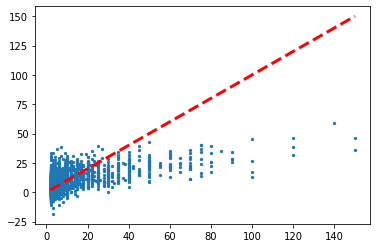

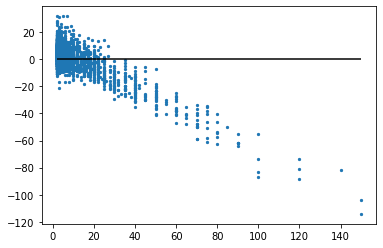

[('Off duels per 90', 6.6461, 7.2),
 ('Back passes acc. %', -5.1474, 92.7),
 ('Weight', 3.2021, 74.9),
 ('Crosses, %', 3.1731, 30.1),
 ('Aerial duels per 90', 2.992, 3.5),
 ('Succ. att. actions', -2.5116, 3.4),
 ('Contract expires', 2.4759, 2.2),
 ('Touches in box per 90', 2.4617, 2.0),
 ('Non-penalty goals', -2.3125, 2.8),
 ('Avg pass length, m', 2.276, 18.2),
 ('Dribbles per 90', -2.0996, 3.0),
 ('Crosses to goalie box per 90', -1.9812, 0.2),
 ('Head goals total', 1.8395, 0.5),
 ('Aerial duels won %', -1.7376, 43.1),
 ('Off duels won %', -1.7333, 43.1),
 ('Tackles per opp.30', 1.4849, 0.6),
 ('Lng passes acc. %', -1.4309, 55.0),
 ('Fwd passes acc. %', -1.2585, 71.7),
 ('Fwd passes per 90', 1.2564, 11.9),
 ('Tackles per 90', -1.2474, 0.4),
 ('Passes acc. %', 1.2386, 81.4),
 ('Crosses from left, %', -1.0996, 24.9),
 ('Second assists per 90', 1.0408, 0.1),
 ('Interceptions per 90', -1.0032, 3.4),
 ('Yellow cards', -0.9494, 3.0),
 ('Lat passes per 90', -0.889, 14.1),
 ('Tackle succ. %', 

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFECV

pipe = Pipeline(steps=[('preprocessor_pipe', preprocessor),
                       ('feature_selection', RFECV(estimator=LinearRegression(), step=1,
                           min_features_to_select=10, scoring='r2')),
                       ('model', LinearRegression()),
                       ])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)
print("R^2 : ", r2_score(y_train, y_pred))
plt.scatter(y_train,y_pred,s=5)
plt.plot((y_train.min(),y_train.max()), (y_train.min(),y_train.max()),'r--', linewidth=3)
plt.show()
plt.scatter(y_train,y_pred-y_train,s=5)
plt.hlines(0,y_train.min(),y_train.max())
plt.show()

coef = pipe['model'].coef_.round(4)
importances = zip(COLUMNS, coef, list(summary.iloc[1]))
sorted(importances, key=lambda x: abs(x[1]), reverse=True)

Komentarz
-----------------
- Za mało jest danych dla drogich zawodników,
    czy jak się odrzuci część danych, to model będzie bardziej dopasowany?
- Zrobiłem tylko dopasowanie tylko dla obrońców, ze zmiennymi dla obrońców R^2 było podobne.
- Poniżej rozkład zmiennych w funkcji kosztu zawodnika, kolory w skali logarytmicznej
* większość zmiennych przypomina rozkład normalny. (czyli nie ma zależności)??
* rankingi drużyn i państw mają inny rozkład.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


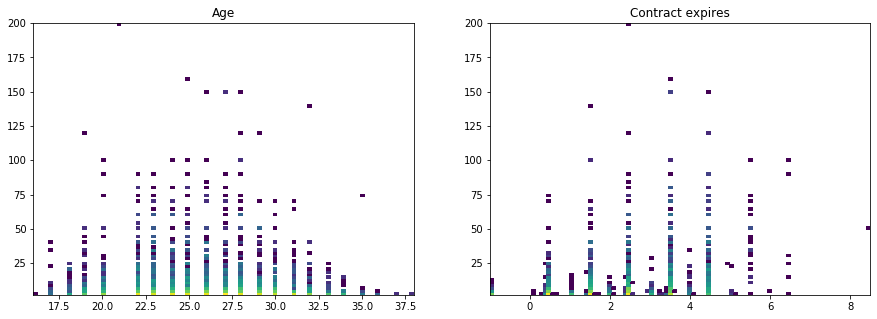

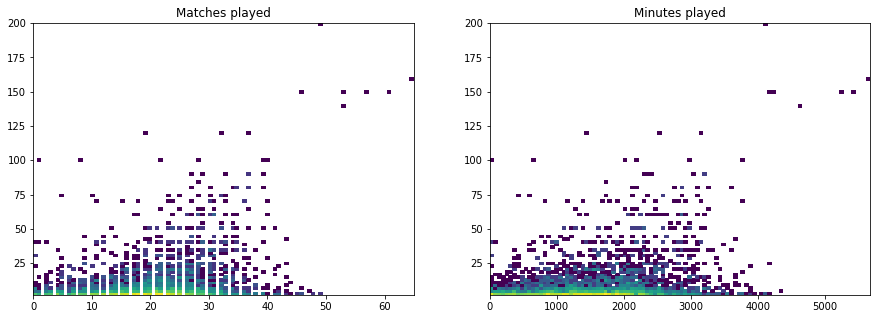

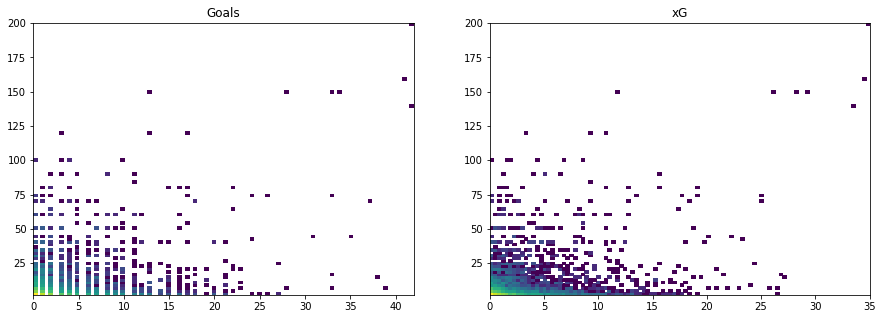

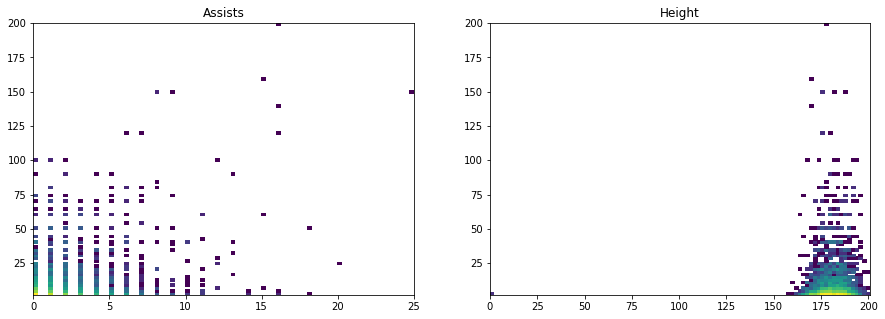

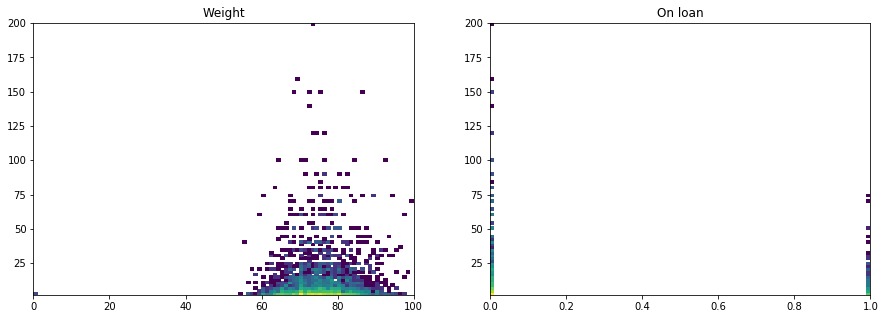

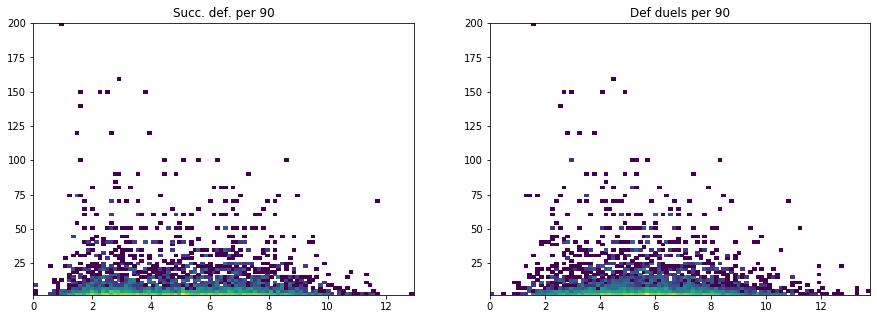

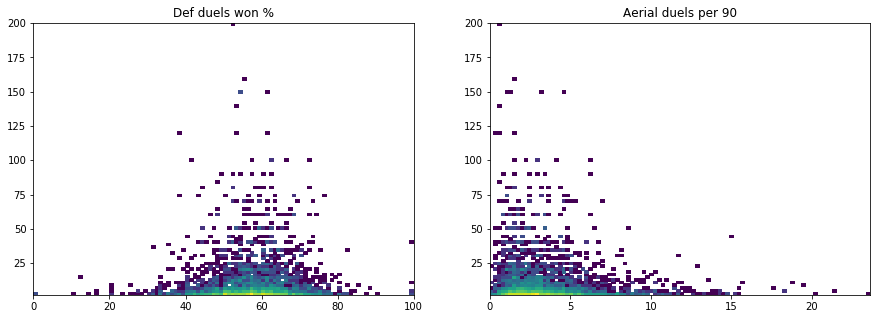

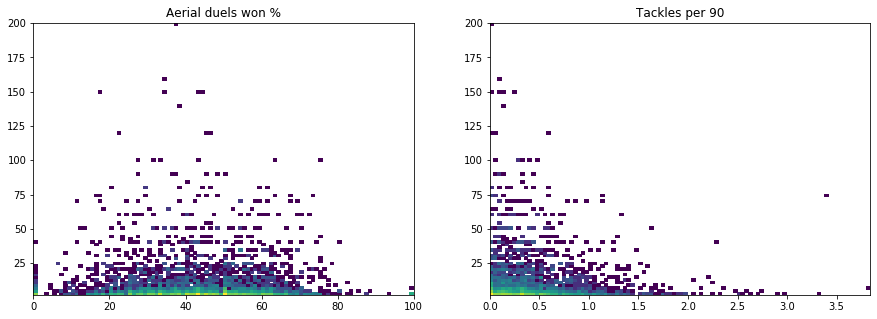

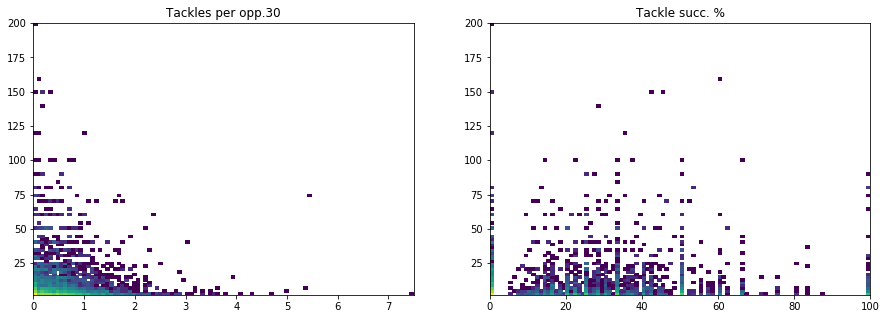

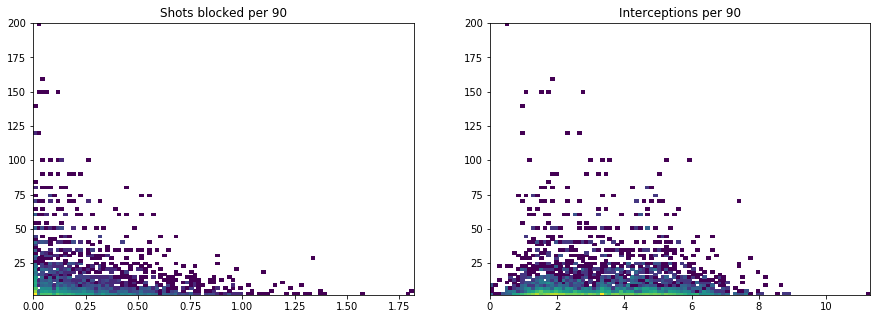

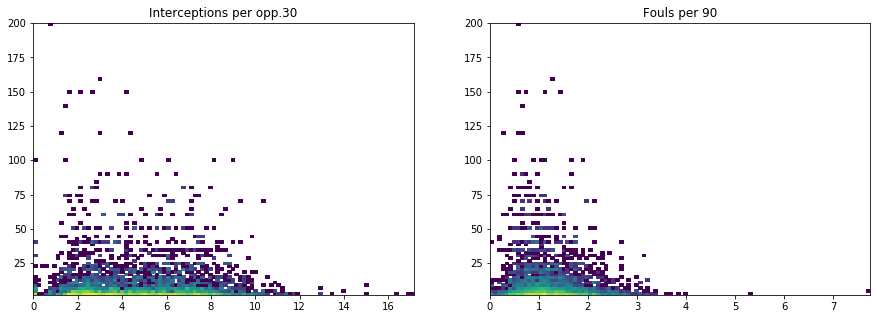

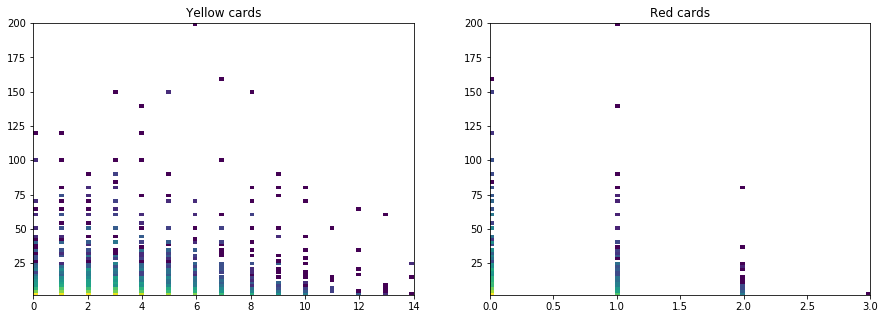

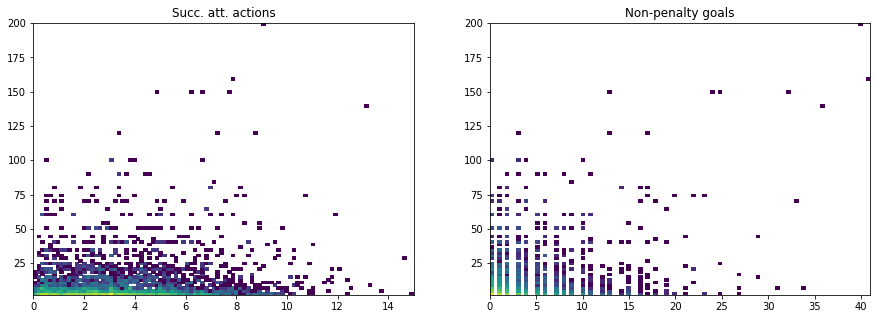

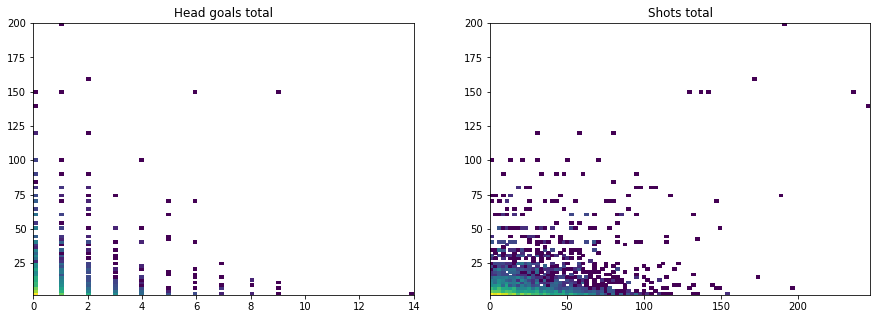

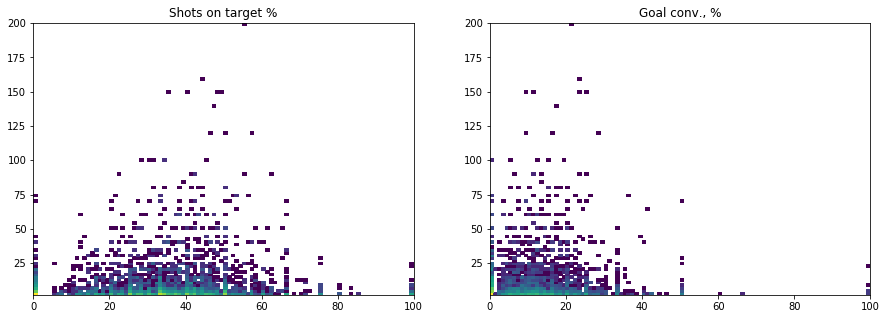

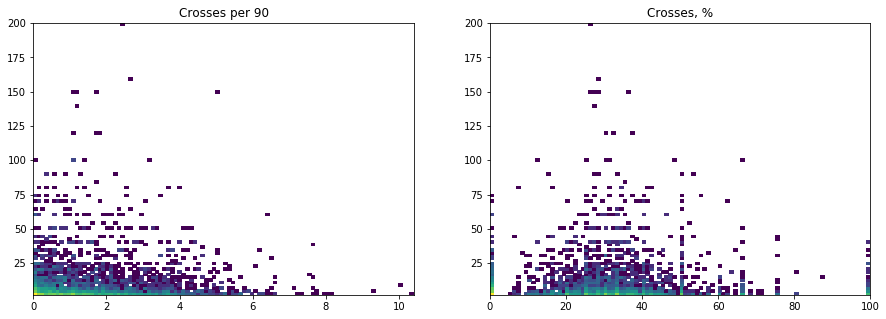

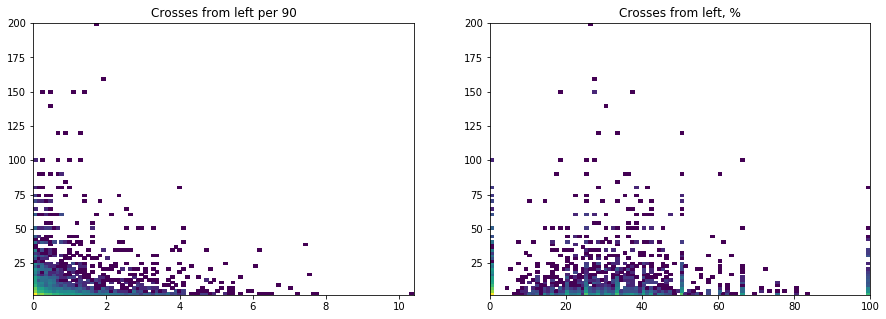

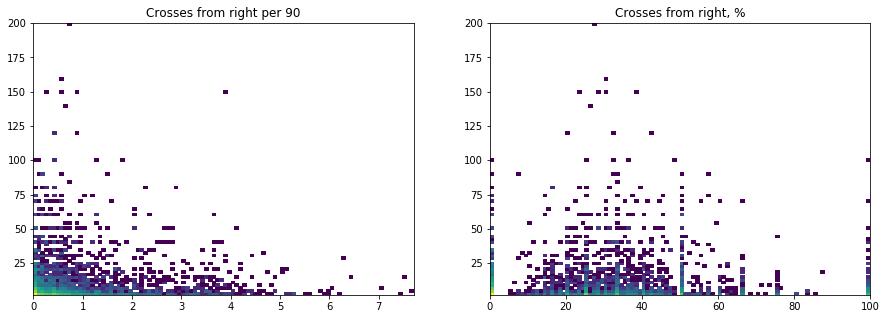

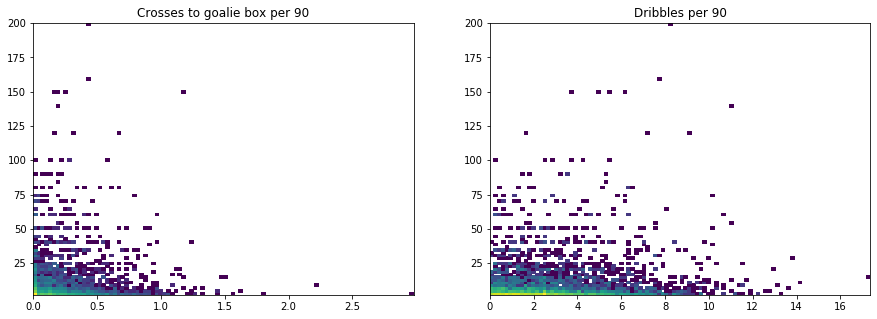

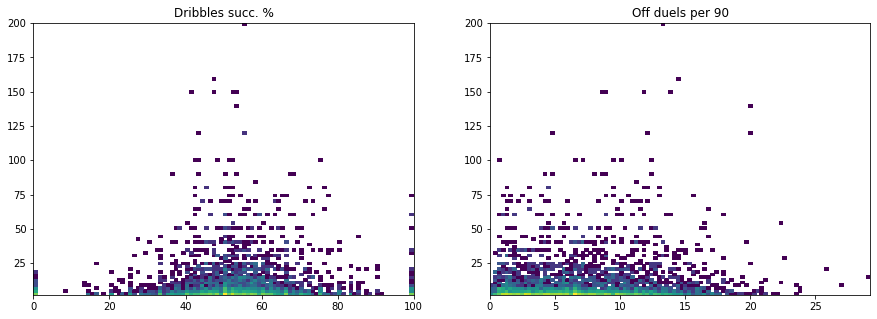

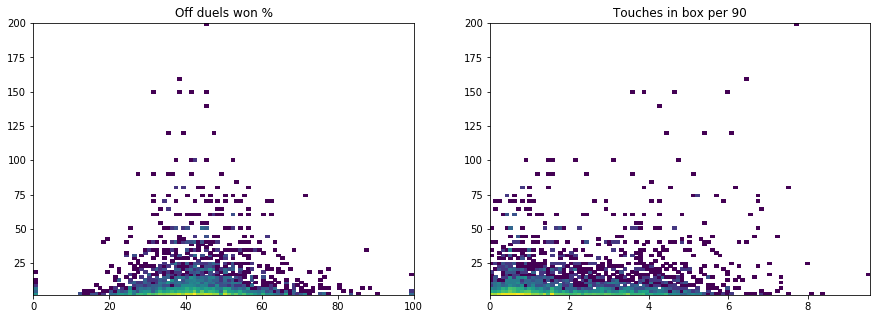

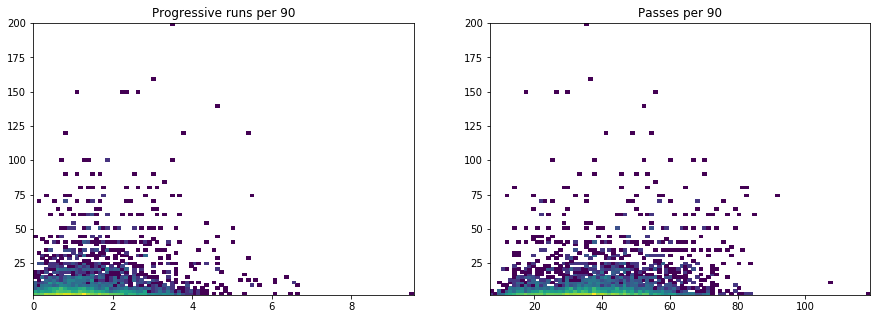

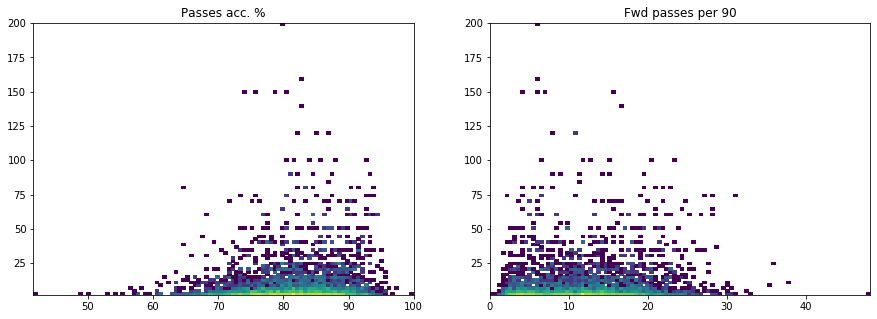

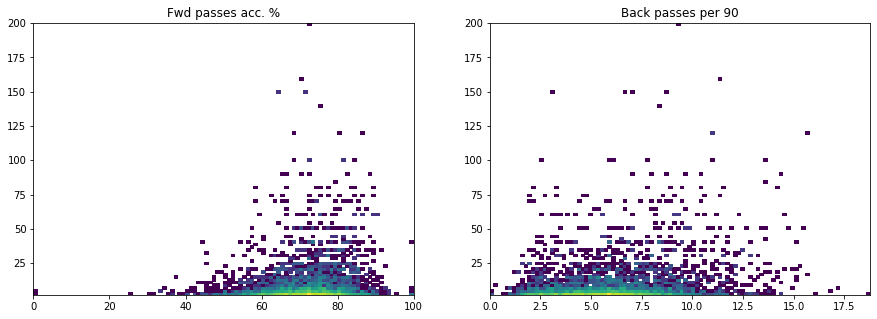

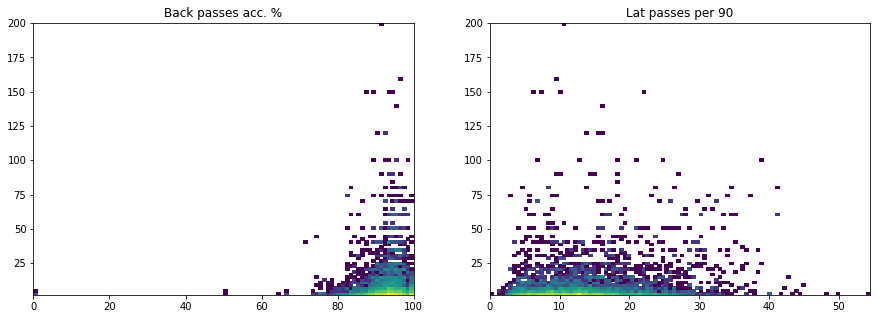

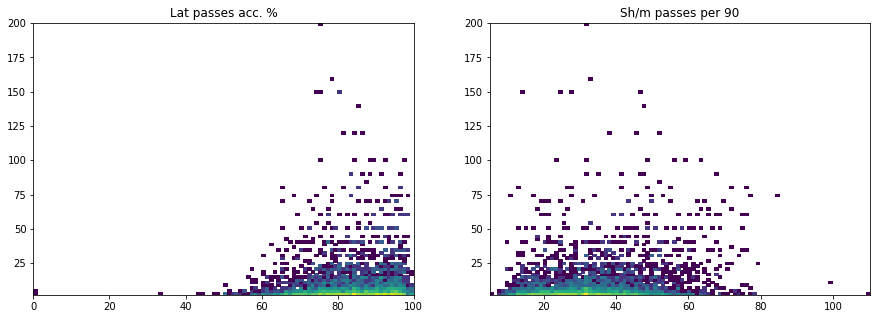

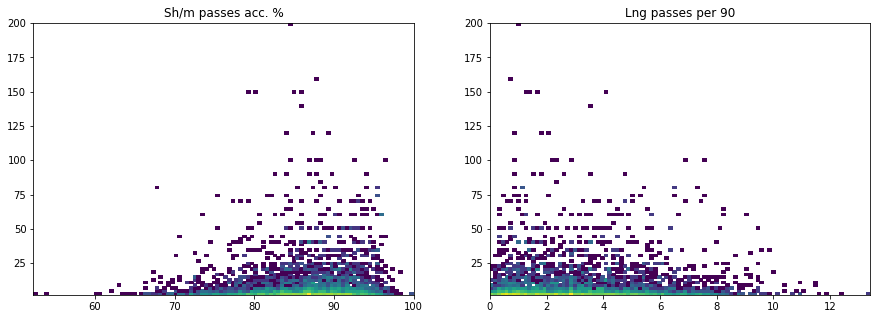

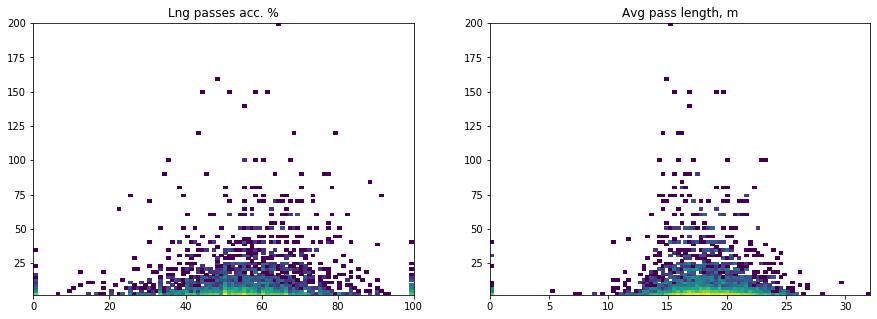

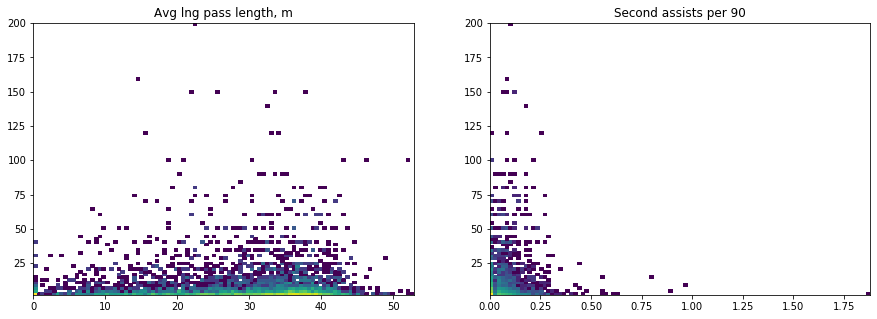

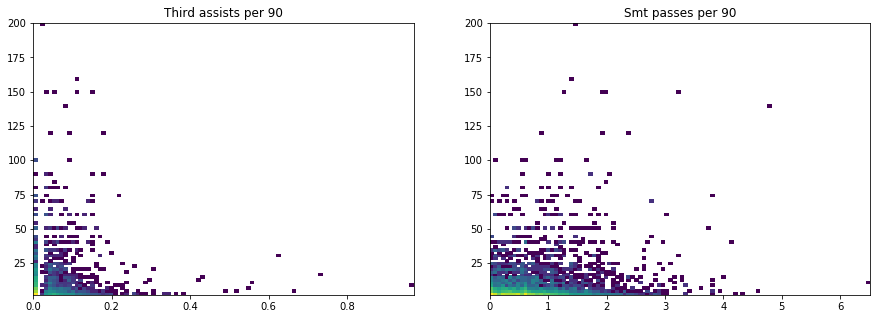

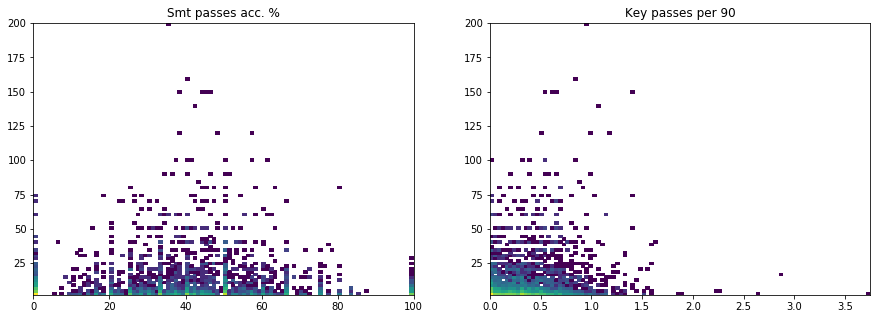

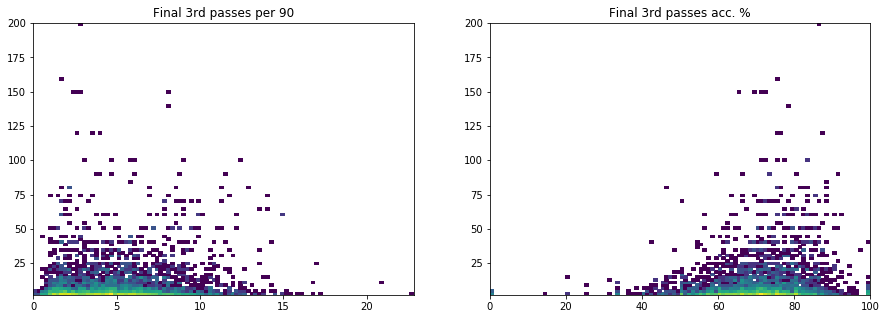

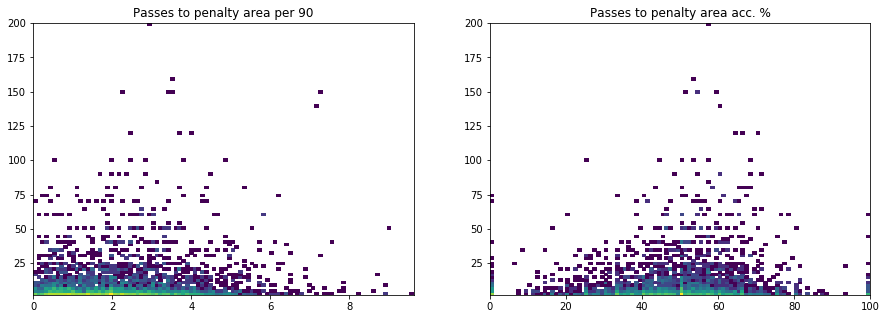

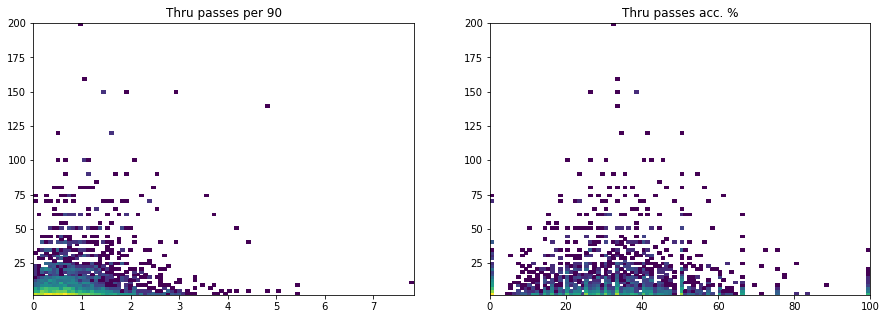

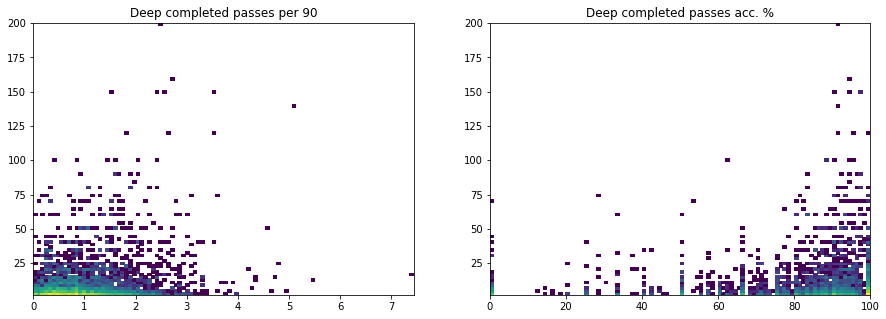

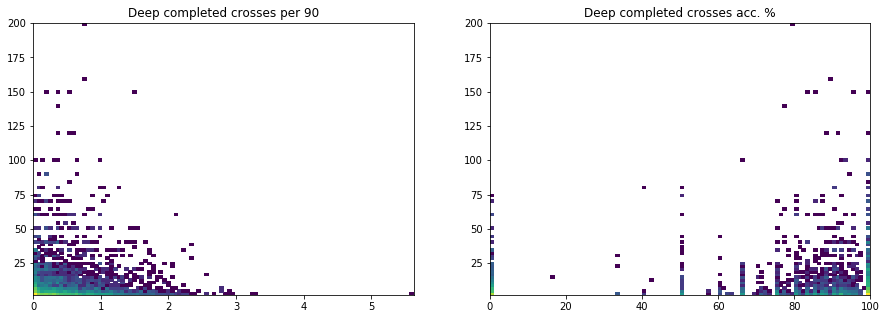

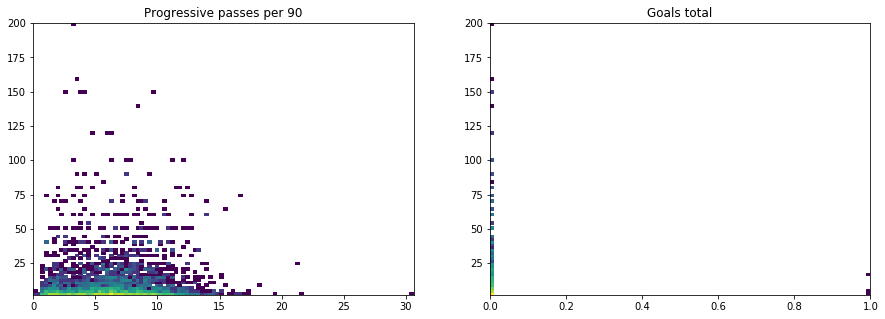

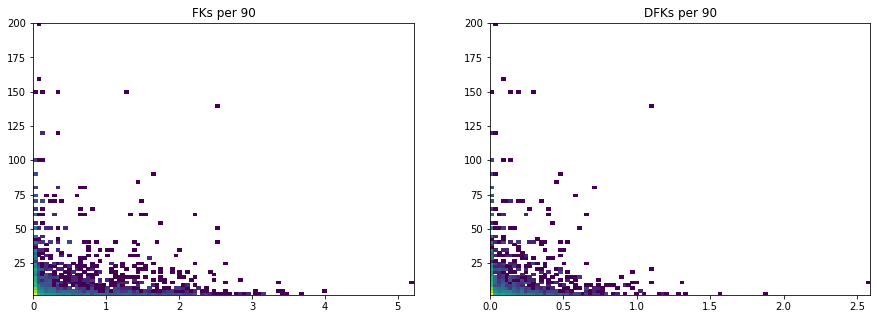

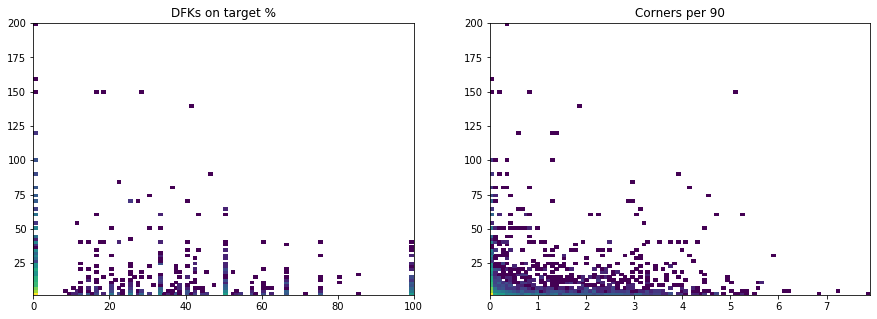

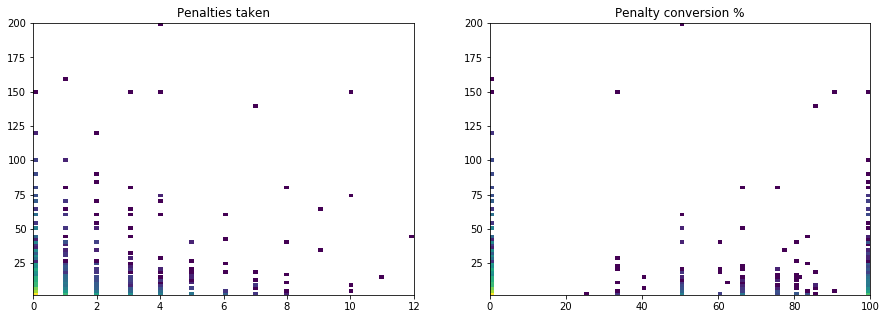

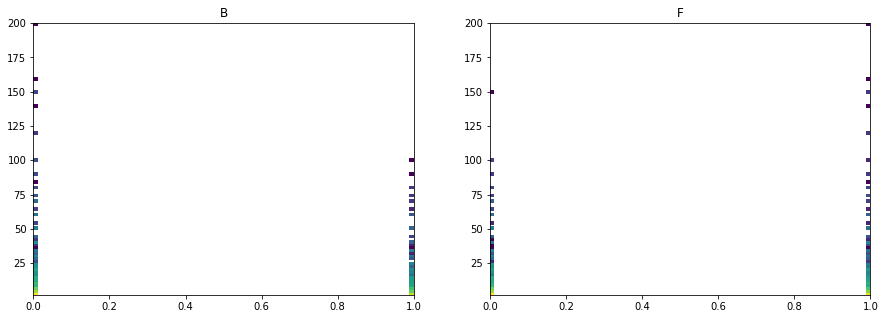

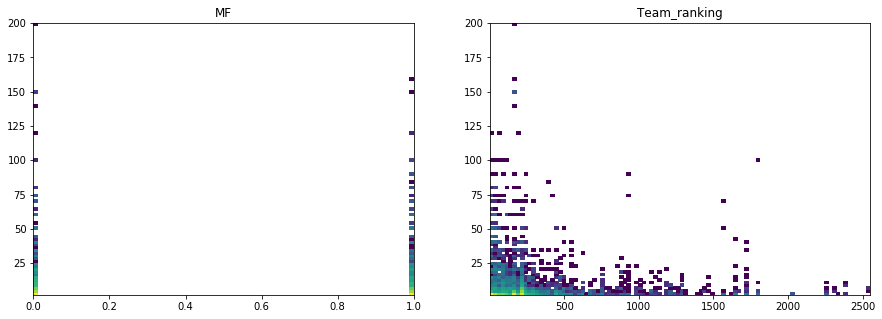

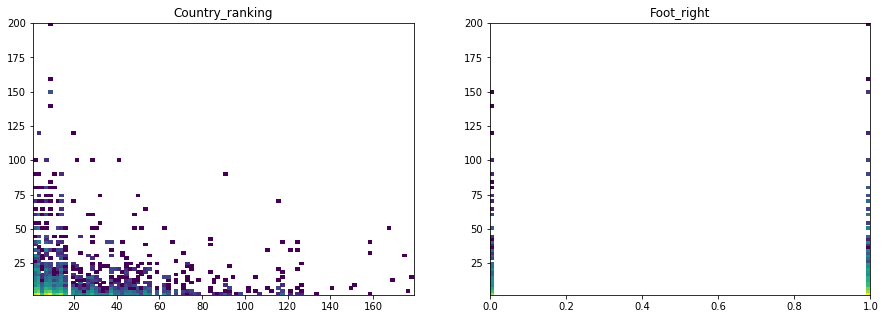

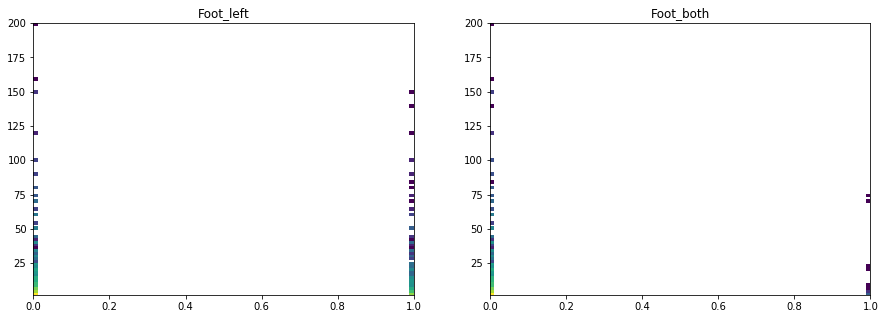

In [10]:
import matplotlib as mpl
import pylab as plt

i=0
while i < len(COLUMNS):
    if i==len(COLUMNS)-1:
        pass
        
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    
    ax1.hist2d(numeric_data[COLUMNS[i]], target, bins=(100, 100), norm=mpl.colors.LogNorm())
    ax1.title.set_text(COLUMNS[i])
    
    ax2.hist2d(numeric_data[COLUMNS[i+1]], target, bins=(100, 100), norm=mpl.colors.LogNorm())
    ax2.title.set_text(COLUMNS[i+1])
    i+=2
